<a href="https://colab.research.google.com/github/atharvakarnik/DataScience/blob/master/CV_MotionBlur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2 as cv

In [2]:
img = cv.imread('Esther.jpg')
imgRsz = cv.resize(img, (int(img.shape[1]/5), int(img.shape[0]/5)))
print(img.shape)
print(imgRsz.shape)

(1536, 2048, 3)
(307, 409, 3)


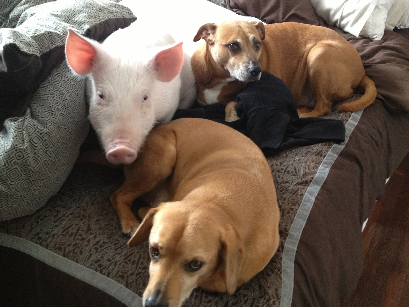

In [3]:
#cv.imshow("Esther & Co.", img)
#cv.waitKey(0)
#cv.destroyAllWindows()
#Since the cv2.imshow is disabled in Colab, importing specialized library
from google.colab.patches import cv2_imshow
cv2_imshow(imgRsz)

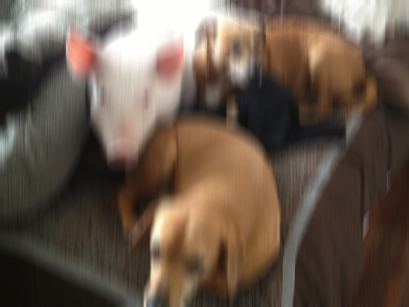

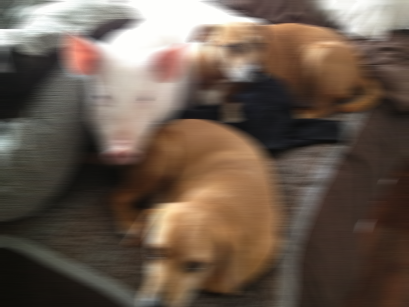

In [4]:
kernel_size = 20
kernel_v = np.zeros((kernel_size, kernel_size)) 
kernel_h = np.copy(kernel_v) 

kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size) 
kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)

kernel_v /= kernel_size 
kernel_h /= kernel_size 

vertical_mb = cv.filter2D(imgRsz, -1, kernel_v)
horizonal_mb = cv.filter2D(imgRsz, -1, kernel_h) 

cv2_imshow(vertical_mb)
cv2_imshow(horizonal_mb)

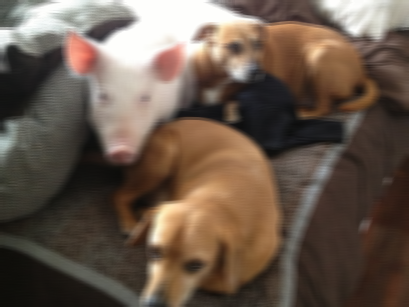

In [5]:
raw_kern = np.array([[0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0]])
raw_mb = cv.filter2D(imgRsz, -1, raw_kern) 
cv2_imshow(raw_mb)

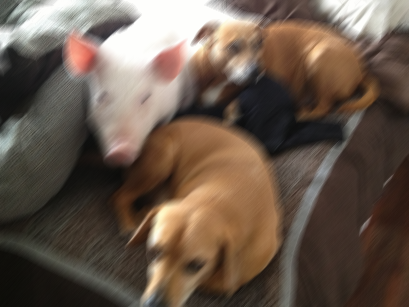

In [6]:
diag_kern = np.array([[0,0,0,0,0,0,0,0,0.1,0],
                    [0,0,0,0,0,0,0,0,0.1,0],
                    [0,0,0,0,0,0,0,0.1,0,0],
                    [0,0,0,0,0,0,0.1,0,0,0],
                    [0,0,0,0,0,0.1,0,0,0,0],
                    [0,0,0,0,0.1,0,0,0,0,0],
                    [0,0,0,0.1,0,0,0,0,0,0],
                    [0,0,0.1,0,0,0,0,0,0,0],
                    [0,0.1,0,0,0,0,0,0,0,0],
                    [0.1,0,0,0,0,0,0,0,0,0]])
diag_mb = cv.filter2D(imgRsz, -1, diag_kern) 
cv2_imshow(diag_mb)

In [7]:
cv.imwrite('vertical.jpg', vertical_mb)
cv.imwrite('horizontal.jpg', horizonal_mb)
cv.imwrite('raw.jpg', raw_mb)
cv.imwrite('diag.jpg', diag_mb)

True

In [8]:
import csv

fields = ['filename', 'MotionBlur']
rows = [['diag.jpg', 'Yes'],
        ['horizontal.jpg', 'Yes'],
        ['raw.jpg', 'Yes'],
        ['vertical.jpg', 'Yes']]
filename = 'dataset.csv'

with open(filename, 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerow(fields)
  csvwriter.writerow(rows)

In [9]:
import pandas as pd
pdfile = pd.read_csv('dataset.csv')
pdfile.head

<bound method NDFrame.head of                                                          filename               MotionBlur
['diag.jpg', 'Yes'] ['horizontal.jpg', 'Yes']  ['raw.jpg', 'Yes']  ['vertical.jpg', 'Yes']>

In [10]:
#Random number unifor distribution
import random
print('{:.2f}'.format(random.uniform(0, 1)))

0.61


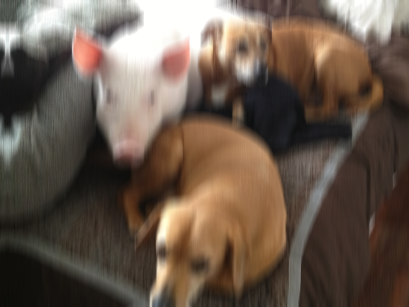

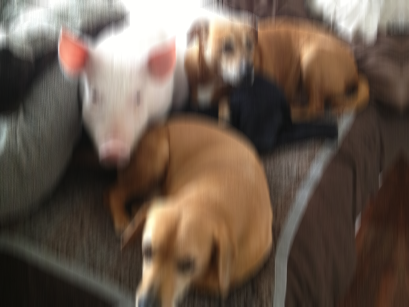

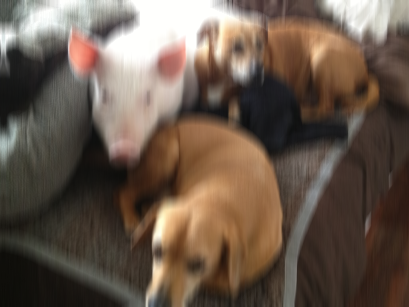

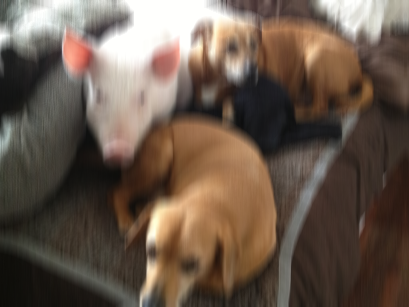

In [12]:
vert_kern1 = np.array([[0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0.067,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

vert_kern2 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067]])

vert_kern3 = np.array([[0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0.067,0,0,0,0,0,0,0,0,0,0]])

vert_kern4 = np.array([[0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0.067,0,0,0,0]])

#Display the convolutions
vert1 = cv.filter2D(imgRsz, -1, vert_kern1) 
vert2 = cv.filter2D(imgRsz, -1, vert_kern2) 
vert3 = cv.filter2D(imgRsz, -1, vert_kern3) 
vert4 = cv.filter2D(imgRsz, -1, vert_kern4) 
cv2_imshow(vert1)
cv2_imshow(vert2)
cv2_imshow(vert3)
cv2_imshow(vert4)